Rede Neural - Perceptron

Função Sigmoid.

In [1]:
import numpy as np

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

Desenhando a função sigmoid:

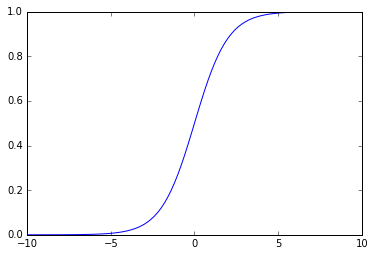

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(-10., 10., 0.2)

values = []
for item in x:
    values.append(sigmoid(item))

plt.plot(x, values)
plt.show()

Função auxiliar para ler dados:

In [3]:
def loadDataSet(file):
    dataMat = []; labelMat = []
    fr = open(file)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # add bias value.
        dataMat.append([float("1.0"), float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

Função de treinamento:

In [4]:
import numpy as np

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.1
    maxCycles = 20000
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        sme = np.mean(np.asarray(error)**2)
        if (sme < 0.03):
            print('Epochs: %d\n' % (k))
            break
        weights = weights + (alpha * dataMatrix.transpose() * error)
    return weights

Modelo treinado:

In [5]:
dataMatIn, classLabels = loadDataSet('trainingset.txt')
weights = gradAscent(dataMatIn, classLabels)
print (weights)

Epochs: 86

[[ 71.8135133 ]
 [ 11.28854468]
 [-10.08488433]]


Desenhando o modelo treinado:

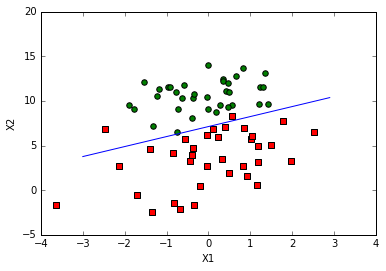

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plotBoundary(weights):
    dataMat, labelMat = loadDataSet('trainingset.txt')
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.array(np.arange(-3.0, 3.0, 0.1))
    y = np.array((-weights[0] - (weights[1] * x)) / weights[2])[0]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

plotBoundary(weights)

We can classify a new dataset, by following:

In [25]:
import numpy as np

def classify(inX, weights):
    prob = sigmoid(inX * weights)
    if prob > 0.5: return 1.0
    else: return 0.0

dataMatIn, classLabels = loadDataSet('testset.txt')

i = -1; hit = 0
for item in dataMatIn:
    i += 1
    y = classify(item, weights)
    if (y == classLabels[i]):
        hit += 1

items = len(dataMatIn)
print('%d erros of %d.' % ((items - hit), items))
print('Accuracy: %0.2f' % ((hit * 100) / items))

1 erros of 30.
Accuracy: 96.67
